In [ ]:
# 가중치의 초깃 값을 설정하는 방법

# 가중치 감소weight decay를 통해 오버피팅을 억제해 범용 성능을 높일 수 있다.
# 간단히 풀이하자면, 가중치 매개변수의 값이 작아지도록 학습하는 방법이다.
# 가중치의 값이 작다면 오버피팅도 일어나지 않을 것이다.

# 어차피 가중치 값을 작게 할거라면 가중치 초기값을 0으로 설정하면 되지 않을까?
'''
가중치의 초기값을 0으로 해서는 안된다.(정확히 말하면 가중치를 균일한 값으로 설정하면 안된다)
이유는, 최초의 가중치들이 모두 균일한 값일 경우 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다. (오차역전파법에서 곱셈노드는 서로의 값을 바꿔치기하여 곱했는데, 균일한 값이라면...)
따라서 갱신을 거쳐도 모두 같은 값을 유지하게 되므로, 가중치를 여러개 갖는 의미를 사라지게 한다(딥러닝 불가).
따라서 이렇게 가중치가 '고르게' 되는 상황을 막기 위해서, 정확히는 가중치의 대칭적인 구조를 무너뜨리기 위해 초깃값을 무작위로 설정해야한다.
'''

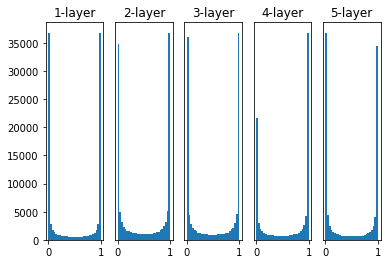

In [2]:
# 가중치의 초깃값에 따라 은닉층의 활성화값(활성화 함수의 출력 데이터)이 어떻게 바뀌는지 살펴보자.
# *활성화 값 : 계층 사이를 흐르는 데이터를 의미하기도 한다.

# 가중치 표준편차 1, 활성화 함수 시그모이드 함수 사용

import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층 수(5층)
activations = {}  # 이곳에 활성화 결과(활성화 값)을 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 가중치의 분포를 잘 살펴볼 것. 곱해지는 숫자가 표준편차이다.
    w = np.random.randn(node_num, node_num) * 1 # 표준편차가 1
    # w = np.random.randn(node_num, node_num) * 0.01 # 표준편차가 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수로 무엇을 사용할 것인가?
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 각 층의 활성화 값들이 0과 1에 치우쳐 분포되어있다.
# 시그모이드 함수는  0과 1에 가까울 수록 미분값이 0에 가까워진다.
# 따라서 활성화 값이 0과 1에 치우칠수록 역전파의 기울기 값이 점점 작아지다가 사라지게 된다.
# 이를 기울기 소실gradient vanishing이라고 하며, 층을 깊게 하는 딥러닝에서 더욱 큰 문제가 된다.

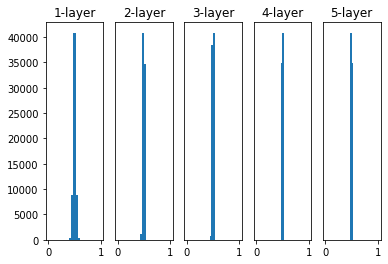

In [3]:
# 가중치 표준편차 0.01, 활성화 함수 시그모이드 함수 사용

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층 수(5층)
activations = {}  # 이곳에 활성화 결과(활성화 값)을 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 가중치의 분포를 잘 살펴볼 것. 곱해지는 숫자가 표준편차이다.
    # w = np.random.randn(node_num, node_num) * 1 # 표준편차가 1
    w = np.random.randn(node_num, node_num) * 0.01 # 표준편차가 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # 표준편차가 xavier 초기값
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수로 무엇을 사용할 것인가?
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 활성화 값이 0과 1에 치우치지 않아 기울기 소실 문제는 일어나지 않는다.
# 그러나, 활성화 값이 0.5 부근에 집중되었음은, 다수의 뉴런이 거의 같은 값을 출력하고 있다는 것을 알려준다.
# 이는 곧 뉴런을 여러 개 둔 의미가 없음을 가리킨다.
# 이를 '표현력을 제한'한다고 말한다.
# 따라서 각 층의 활성화 값은 적당히 고루 분포되어야한다. 층과 층 사이에 적당하게 다양한 데이터가 흘러야 신경망 학습이 효율적으로 이루어지기 때문이다.

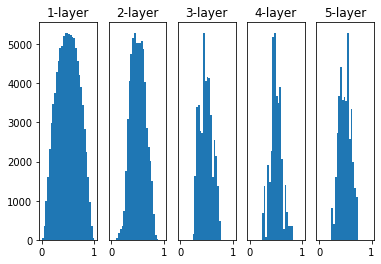

In [7]:
# 가중치 표준편차 xavier 초깃값, 활성화 함수 시그모이드 함수 사용
# 일반적인 딥러닝 프레임워크가 표준적으로 이용하는 초깃값
# 시그모이드 함수와 tanh 함수는 좌우 대칭이므로 중앙 부근이 선형 함수인데, Xavier 초깃값은 선형함수에 특화된 초깃값이다.

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층 수(5층)
activations = {}  # 이곳에 활성화 결과(활성화 값)을 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 가중치의 분포를 잘 살펴볼 것. 곱해지는 숫자가 표준편차이다.
    # w = np.random.randn(node_num, node_num) * 1 # 표준편차가 1
    # w = np.random.randn(node_num, node_num) * 0.01 # 표준편차가 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # 표준편차가 xavier 초기값
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수로 무엇을 사용할 것인가?
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 앞의 방식들과 비교하여 확실히 넓게 분포된다.
# 각 층에 흐르는 데이터가 적당히 퍼져있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이루어질 것이다.
# 층이 깊어질수록 형태가 활성화 값 분포가 일그러지는 문제는 시그모이드 함수 대신 tanh함수를 사용하면 개선된다.

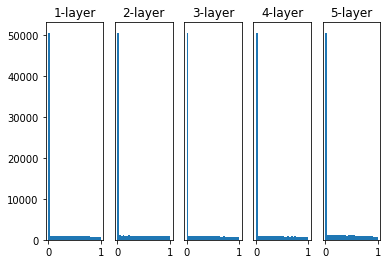

In [8]:
# 가중치 표준편차 He 초깃값, 활성화 함수 ReLU함수 사용
# ReLU함수에 특화된 초깃값은 He 초깃값(계수가 Xavier 초깃값 계수의 2배)
# ReLU는 음의 영역이 0이라 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 직관적으로 추정할수 있음.

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층 수(5층)
activations = {}  # 이곳에 활성화 결과(활성화 값)을 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 가중치의 분포를 잘 살펴볼 것. 곱해지는 숫자가 표준편차이다.
    # w = np.random.randn(node_num, node_num) * 1 # 표준편차가 1
    # w = np.random.randn(node_num, node_num) * 0.01 # 표준편차가 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # 표준편차가 xavier 초기값
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수로 무엇을 사용할 것인가?
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 표준편차가 0.01일 경우 활성화 값들이 아주 작은 값이어서, 역전파 때 가중치의 기울기가 매우 작아져 학습이 거의 이뤄지지 않을 것이다.
# Xavier 초깃값을 사용했을 경우 층이 깊어지면서 치우침이 커져, 결과적으로 학습할 때 '기울기 소실'문제가 일어난다.
# He 초깃값은 모든 층에서 균일하게 분포하므로, 역전파 때에도 적절한 값이 나올 것이다.

===========iteration:0===========
std=0.01:2.302524083181672
Xavier:2.28871491117717
He:2.361757015281415
===========iteration:100===========
std=0.01:2.3028399111298246
Xavier:2.207359861153358
He:1.4234066269045833
===========iteration:200===========
std=0.01:2.302774834014783
Xavier:2.0182418805729343
He:0.765850983622566
===========iteration:300===========
std=0.01:2.302194283545702
Xavier:1.5232893989423415
He:0.45717807792987897
===========iteration:400===========
std=0.01:2.301008408817327
Xavier:0.918386214754854
He:0.3774211705481042
===========iteration:500===========
std=0.01:2.3052199550748185
Xavier:0.8131380545045797
He:0.4457307003236797
===========iteration:600===========
std=0.01:2.2982599652157405
Xavier:0.6352023436249314
He:0.31635018998307723
===========iteration:700===========
std=0.01:2.3063828353664784
Xavier:0.5837945758528386
He:0.39168912681921486
===========iteration:800===========
std=0.01:2.301911001040968
Xavier:0.45449020514358074
He:0.3023948906910007
=

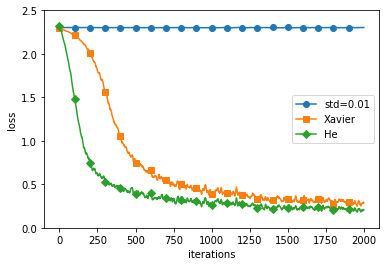

In [9]:
# MNIST 데이터 셋으로 본 가중치 초깃값 비교
# '실제' 데이터에서 가중치의 초깃값에 따라 신경망 학습이 얼마나 좌우되는가?

import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNIST데이터 학습
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1: 초깃값과 최적화 방식 설정
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2: 반복학습
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 초깃값이 0.01인 경우, 신경망 학습이 아예 이뤄지지 않는다.
# 초깃값이 Xavier인지 He인지에 따라 학습 결과가 달라진다.